In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy.spatial import Delaunay
import pickle

import RODFF
import RODFF.Mesh_maker as Mesh_maker
import RODFF.Calc_path as Calc_path
import RODFF.Functions as Functions

import datetime, time
import platform


import simpy

import shapely.geometry
from simplekml import Kml, Style

import numpy as np

import digital_twin.core as core
import digital_twin.model as model
import digital_twin.plot as plot

timeQ = time

In [2]:
name_textfile_load = 'test'

with open(name_textfile_load, 'rb') as input:
    Roadmap = pickle.load(input)

## shows variable speed

t0 = '01/07/2013 20:00:00'
start = (53.051185, 5.053046)
stop = (53.331927, 5.125379)

vmax = 5

In [69]:
## mooiste plaatje ooit

t0 = '01/07/2013 16:00:00'
start = (52.979669, 4.755589)
stop = (53.331927, 5.125379)

vmax = 5

## vaart niet over eilanden

t0 = '01/07/2013 23:50:00'
start = (53.176232, 5.397849)
stop = (53.280218, 4.939846)
#stop = (53.442070, 5.385254)


vmax = 5

In [70]:
start_time = time.time()


vvmax = Roadmap.vship[:,-1]

vv= np.abs(vvmax - vmax)
arg_vship = int(np.argwhere(vv == vv.min())[0])

class graph_functions_time:
    function_type = "time optimalisation"
    weights = Roadmap.weight_time[arg_vship].weights
    time = Roadmap.weight_time[arg_vship].weights
    vship = Roadmap.vship[arg_vship]
    graph = Roadmap.graphs[arg_vship]

class graph_functions_cost:
    function_type = "time optimalisation"
    weights = Roadmap.weight_cost[arg_vship].weights
    time = Roadmap.weight_time[arg_vship].weights
    vship = Roadmap.vship[arg_vship]
    graph = Roadmap.graphs[arg_vship]

class graph_functions_space:
    function_type = "time optimalisation"
    weights = Roadmap.weight_space[arg_vship].weights
    time = Roadmap.weight_time[arg_vship].weights
    vship = Roadmap.vship[arg_vship]
    graph = Roadmap.graphs[arg_vship]

route = Calc_path.Has_route(start, stop, Roadmap, t0, graph_functions_cost)
route_time = Calc_path.Has_route(start, stop, Roadmap, t0, graph_functions_time)
route_space = Calc_path.Has_route(start, stop, Roadmap, t0, graph_functions_space)

path2 = np.array(route_space.route[:,0], dtype=int)
path_s = np.zeros((len(route_space.route[:,0]),2))
path_s[:,0] = Roadmap.nodes[path2][:,1]
path_s[:,1] = Roadmap.nodes[path2][:,0]

path2 = np.array(route_time.route[:,0], dtype=int)
path_t = np.zeros((len(route_time.route[:,0]),2))
path_t[:,0] = Roadmap.nodes[path2][:,1]
path_t[:,1] = Roadmap.nodes[path2][:,0]

path2 = np.array(route.route[:,0], dtype=int)
path = np.zeros((len(route.route[:,0]),2))
path[:,0] = Roadmap.nodes[path2][:,1]
path[:,1] = Roadmap.nodes[path2][:,0]

tim = route.route[:,1]

dist = []
D = 0
for i in range(route.route[:,0].shape[0] -1 ):
        D =D + Mesh_maker.haversine((route.y_route[i], route.x_route[i]), (route.y_route[i +1], route.x_route[i+1]))
        dist.append(D)
dist = np.array(dist)

stop_time = time.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

the computational time is: 1.57 sec


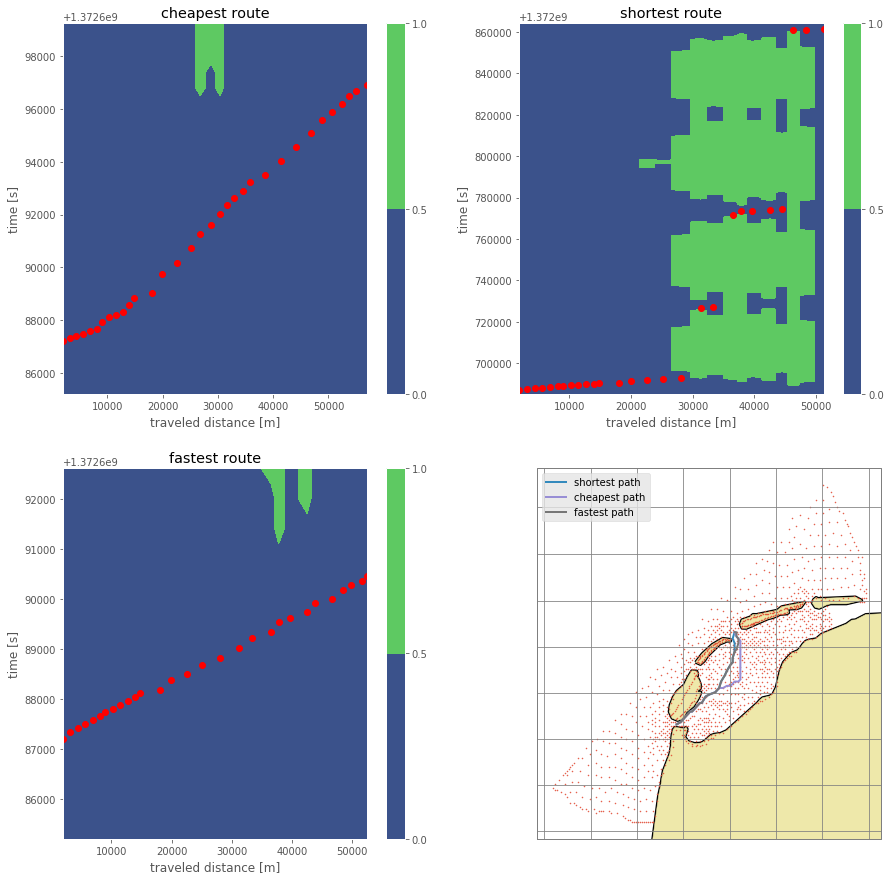

In [71]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(2,2,1)
RODFF.plot_timeseries(route,Roadmap)
plt.title('cheapest route')

ax = plt.subplot(2,2,2)
RODFF.plot_timeseries(route_space,Roadmap)
plt.title('shortest route')


ax = plt.subplot(2,2,3)
RODFF.plot_timeseries(route_time,Roadmap)
plt.title('fastest route')

ax = plt.subplot(2,2,4, projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))
plt.plot(Roadmap.nodes[:,1],Roadmap.nodes[:,0],'.', markersize = 1, transform=ccrs.PlateCarree())
plt.plot(path_s[:,0], path_s[:,1], transform=ccrs.PlateCarree(), label = 'shortest path', linewidth = 2)
plt.plot(path[:,0], path[:,1], transform=ccrs.PlateCarree(), label =  'cheapest path', linewidth = 2)
plt.plot(path_t[:,0], path_t[:,1], transform=ccrs.PlateCarree(), label =  'fastest path', linewidth = 2)

#ax.set_extent([min(path_s[:,0])-0.1,max(path_s[:,0])+0.1,min(path_s[:,1])-0.1,max(path_s[:,1])+0.1], ccrs.PlateCarree())

plt.legend(loc = 'best')

plt.show()

In [72]:
route.route[:,-1]

array([ 5., 16., 16., 16., 16., 16.,  5.,  5., 16., 16.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.])

In [73]:
route_space.route[:,-1]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [74]:
route_time.route[:,-1]

array([ 5., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16.,  5.])